# Evaluating Whether There is Support to Claim that Climate Change Impacts Food Company Stock 
**BUAN 6590: Capstone Project Final Report <br/>
Dolan School of Business <br/>
Fairfield University <br/>
Megan Kuscsik**

In [1]:
# Imported packages
import numpy as np
import statistics
from statistics import stdev 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from numpy import array
from numpy import cov
from statsmodels.tsa.stattools import grangercausalitytests
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load in data
data_orig = pd.read_csv('Capstone_Data_Edit.csv')
data = data_orig.drop(['Year'], axis=1)
data = data_orig

#change Date into DateTime data type and make it index
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
#double check in .info() that change was made--change made
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)

#Removing the commas from "volume" feaures
data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']]  = data[['CORN_Volume','WEAT_Volume','CANE_Volume','HSY_Volume',
      'SJM_Volume','GIS_Volume','PEP_Volume','CPB_Volume']].replace(',', '', regex=True)

#change objects to float
data['CORN_Volume'] = data.CORN_Volume.astype(float)
data['WEAT_Volume'] = data.WEAT_Volume.astype(float)
data['CANE_Volume'] = data.CANE_Volume.astype(float)
data['HSY_Volume'] = data.HSY_Volume.astype(float)
data['SJM_Volume'] = data.SJM_Volume.astype(float)
data['GIS_Volume'] = data.GIS_Volume.astype(float)
data['PEP_Volume'] = data.PEP_Volume.astype(float)
data['CPB_Volume'] = data.CPB_Volume.astype(float)

In [3]:
#resample data monthly
data_month = data.resample('1M').mean()

# Research Questions 1-2
**1. What relationship (if any) exists between climate factors and commodity stocks?** <br/>
**2. What relationship (if any) exists between climate factors and company stocks?** <br/>


### Stock_Close

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Close v Temp_Anamoly')

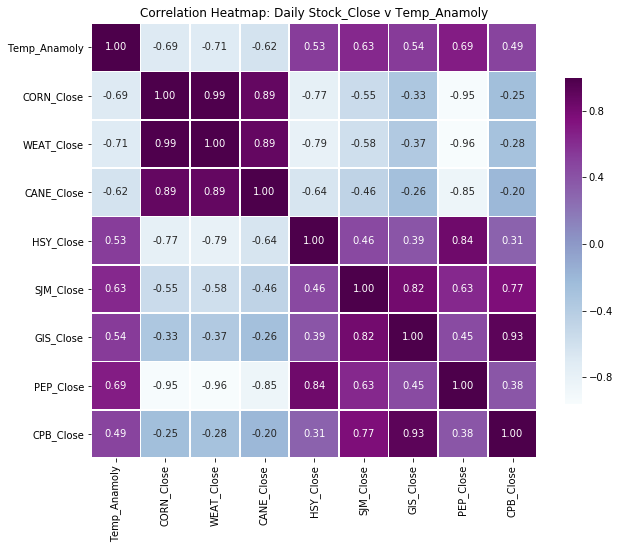

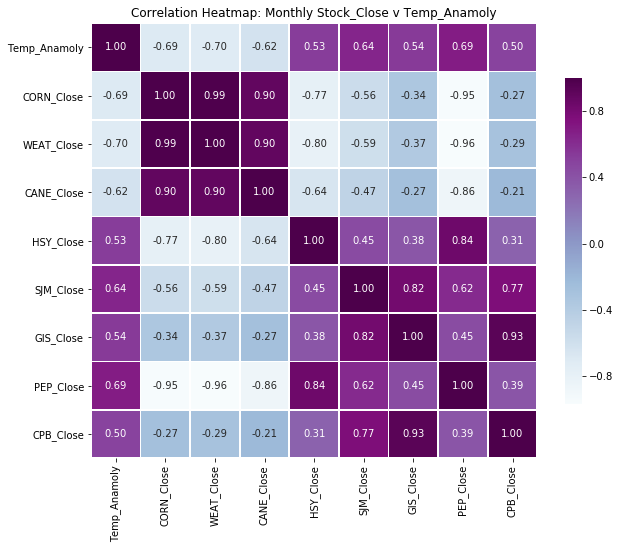

In [4]:
#correlation between daily stock_Close and Temp_Anamoly

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Close v Temp_Anamoly')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['Temp_Anamoly','CORN_Close','WEAT_Close','CANE_Close','HSY_Close','SJM_Close','GIS_Close','PEP_Close','CPB_Close']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Stock_Close v Temp_Anamoly')


## Calculations from Stock_Close features

### Profit
- profit = (Stock_Close x Volume)

In [5]:
#calculate daily profit for each stock 
data['CORN_profit'] = data['CORN_Close'] * data['CORN_Volume']
data['WEAT_profit'] = data['WEAT_Close'] * data['WEAT_Volume']
data['CANE_profit'] = data['CANE_Close'] * data['CANE_Volume']
data['HSY_profit'] = data['HSY_Close'] * data['HSY_Volume']
data['SJM_profit'] = data['SJM_Close'] * data['SJM_Volume']
data['GIS_profit'] = data['GIS_Close'] * data['GIS_Volume']
data['PEP_profit'] = data['PEP_Close'] * data['PEP_Volume']
data['CPB_profit'] = data['CPB_Close'] * data['CPB_Volume']

#calculate monthly profit for each stock 
data_month['CORN_profit'] = data_month['CORN_Close'] * data_month['CORN_Volume']
data_month['WEAT_profit'] = data_month['WEAT_Close'] * data_month['WEAT_Volume']
data_month['CANE_profit'] = data_month['CANE_Close'] * data_month['CANE_Volume']
data_month['HSY_profit'] = data_month['HSY_Close'] * data_month['HSY_Volume']
data_month['SJM_profit'] = data_month['SJM_Close'] * data_month['SJM_Volume']
data_month['GIS_profit'] = data_month['GIS_Close'] * data_month['GIS_Volume']
data_month['PEP_profit'] = data_month['PEP_Close'] * data_month['PEP_Volume']
data_month['CPB_profit'] = data_month['CPB_Close'] * data_month['CPB_Volume']

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Profit v Temp_Anamoly')

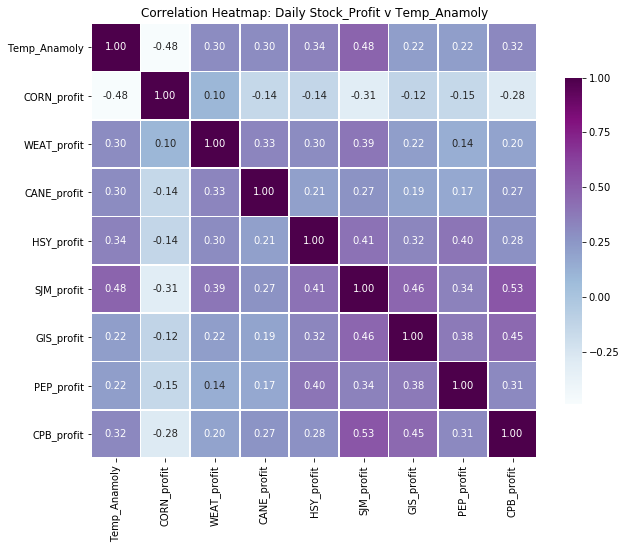

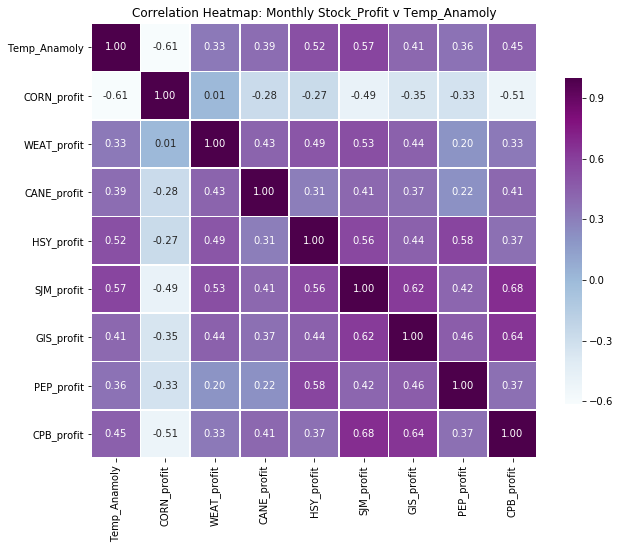

In [6]:
#correlation between daily profit and Temp_Anamoly

##low correlation between daily profit and Temp_Anamoly
stock_per_change = data[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Profit v Temp_Anamoly')

#correlation between monthly profit and Temp_Anamoly

#low correlation between Temp_Anamoly and Daily profit for WEAT, CANE, GIS, PEP, CPB
#moderate correlation between Temp_Anamoly and Daily profit for CORN, HSY, SJM, 
stock_per_change = data_month[['Temp_Anamoly','CORN_profit','WEAT_profit','CANE_profit','HSY_profit','SJM_profit','GIS_profit','PEP_profit','CPB_profit']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Stock_Profit v Temp_Anamoly')

### Return

In [7]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce
#calculate daily return for stocks

data['CORN_return'] = data['CORN_Close'].pct_change(1)
data['WEAT_return'] = data['WEAT_Close'].pct_change(1)
data['CANE_return'] = data['CANE_Close'].pct_change(1)
data['HSY_return'] = data['HSY_Close'].pct_change(1)
data['SJM_return'] = data['SJM_Close'].pct_change(1)
data['GIS_return'] = data['GIS_Close'].pct_change(1)
data['PEP_return'] = data['PEP_Close'].pct_change(1)
data['CPB_return'] = data['CPB_Close'].pct_change(1)

#fill in NaN
data['CORN_return'].fillna(method='bfill', inplace = True)
data['WEAT_return'].fillna(method='bfill', inplace = True)
data['CANE_return'].fillna(method='bfill', inplace = True)
data['HSY_return'].fillna(method='bfill', inplace = True)
data['SJM_return'].fillna(method='bfill', inplace = True)
data['GIS_return'].fillna(method='bfill', inplace = True)
data['PEP_return'].fillna(method='bfill', inplace = True)
data['CPB_return'].fillna(method='bfill', inplace = True)

#calculate monthly return for stocks
data_month['CORN_return'] = data_month['CORN_Close'].pct_change(1)
data_month['WEAT_return'] = data_month['WEAT_Close'].pct_change(1)
data_month['CANE_return'] = data_month['CANE_Close'].pct_change(1)
data_month['HSY_return'] = data_month['HSY_Close'].pct_change(1)
data_month['SJM_return'] = data_month['SJM_Close'].pct_change(1)
data_month['GIS_return'] = data_month['GIS_Close'].pct_change(1)
data_month['PEP_return'] = data_month['PEP_Close'].pct_change(1)
data_month['CPB_return'] = data_month['CPB_Close'].pct_change(1)

#fill in NaN
data_month['CORN_return'].fillna(method='bfill', inplace = True)
data_month['WEAT_return'].fillna(method='bfill', inplace = True)
data_month['CANE_return'].fillna(method='bfill', inplace = True)
data_month['HSY_return'].fillna(method='bfill', inplace = True)
data_month['SJM_return'].fillna(method='bfill', inplace = True)
data_month['GIS_return'].fillna(method='bfill', inplace = True)
data_month['PEP_return'].fillna(method='bfill', inplace = True)
data_month['CPB_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Monthly Stock_Return v Temp_Anamoly')

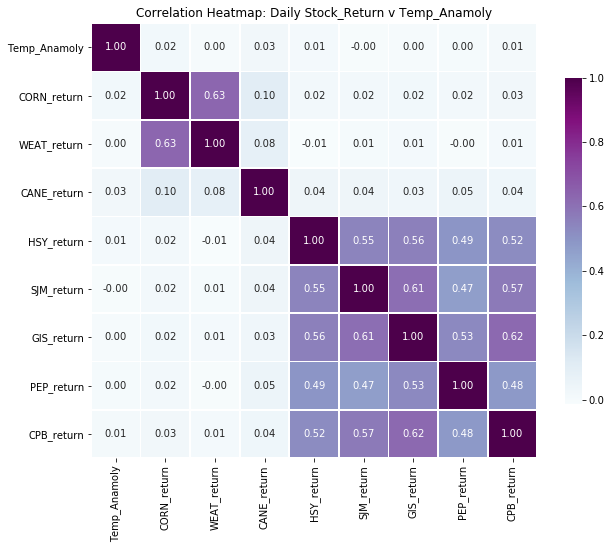

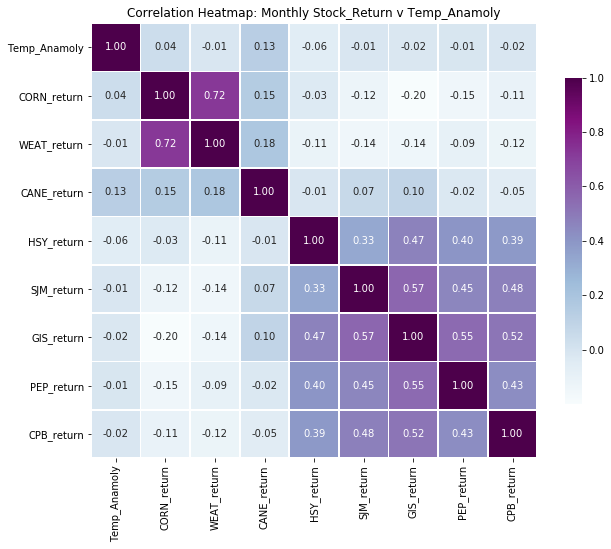

In [8]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#correlation between daily return values in stocks

#no correlation of Temp_Anamoly and daily stock return
stock_per_change = data[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Stock_Return v Temp_Anamoly')

#correlation between monthly return values in stocks

#no correlation between Temp_Anamoly and monthly stock return
stock_per_change = data_month[['Temp_Anamoly','CORN_return','WEAT_return','CANE_return','HSY_return','SJM_return','GIS_return','PEP_return','CPB_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Monthly Stock_Return v Temp_Anamoly')

### Cumulative Returns
- Cumulative return is the return computed relative to the day investment

In [9]:
#https://medium.com/business-analysis/stock-market-analysis-project-722520891dce

#cumulative returns for daily data
#Cumulative return is computed relative to the day investment. 
#If the cumulative return is above one-make a profit--anything else is a loss

data['CORN_cum_return'] = (1 + data['CORN_return']).cumprod()
data['WEAT_cum_return'] = (1 + data['WEAT_return']).cumprod()
data['CANE_cum_return'] = (1 + data['CANE_return']).cumprod()
data['HSY_cum_return'] = (1 + data['HSY_return']).cumprod()
data['SJM_cum_return'] = (1 + data['SJM_return']).cumprod()
data['GIS_cum_return'] = (1 + data['GIS_return']).cumprod()
data['PEP_cum_return'] = (1 + data['PEP_return']).cumprod()
data['CPB_cum_return'] = (1 + data['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

#cumulative return for monthly data
data_month['CORN_cum_return'] = (1 + data_month['CORN_return']).cumprod()
data_month['WEAT_cum_return'] = (1 + data_month['WEAT_return']).cumprod()
data_month['CANE_cum_return'] = (1 + data_month['CANE_return']).cumprod()
data_month['HSY_cum_return'] = (1 + data_month['HSY_return']).cumprod()
data_month['SJM_cum_return'] = (1 + data_month['SJM_return']).cumprod()
data_month['GIS_cum_return'] = (1 + data_month['GIS_return']).cumprod()
data_month['PEP_cum_return'] = (1 + data_month['PEP_return']).cumprod()
data_month['CPB_cum_return'] = (1 + data_month['CPB_return']).cumprod()

#fill in NaN
data['CORN_cum_return'].fillna(method='bfill', inplace = True)
data['WEAT_cum_return'].fillna(method='bfill', inplace = True)
data['CANE_cum_return'].fillna(method='bfill', inplace = True)
data['HSY_cum_return'].fillna(method='bfill', inplace = True)
data['SJM_cum_return'].fillna(method='bfill', inplace = True)
data['GIS_cum_return'].fillna(method='bfill', inplace = True)
data['PEP_cum_return'].fillna(method='bfill', inplace = True)
data['CPB_cum_return'].fillna(method='bfill', inplace = True)

Text(0.5,1,'Correlation Heatmap: Monthly Stock_cum_return v Temp_Anamoly')

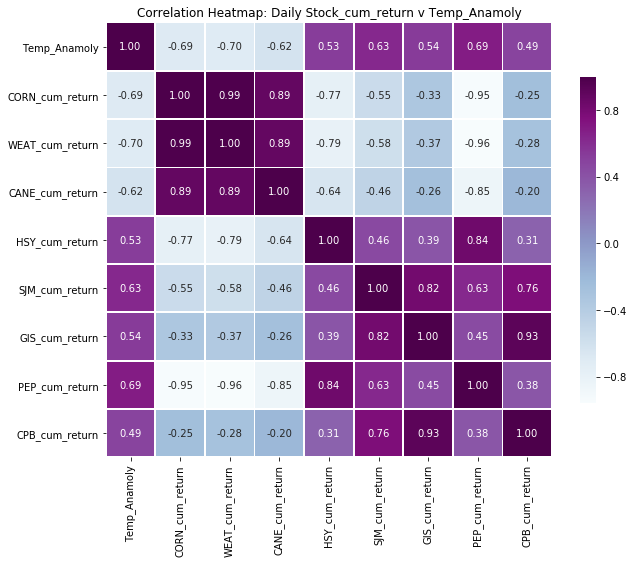

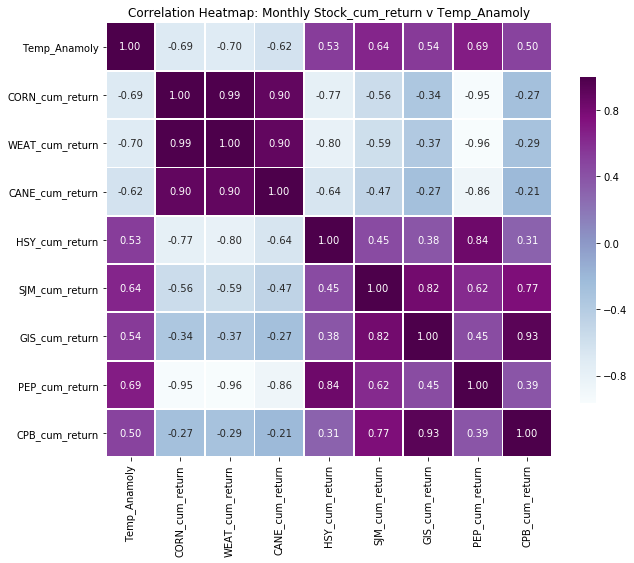

In [10]:
#Correlation with daily cumulative return
#moderate negative correlation of Temp_Anamoly with stock cumulative return
stock_per_change = data[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Daily Stock_cum_return v Temp_Anamoly')

#Correlation with monthly cumulative return
#moderate negative correlation
stock_per_change = data_month[['Temp_Anamoly','CORN_cum_return','WEAT_cum_return','CANE_cum_return','HSY_cum_return','SJM_cum_return',
                         'GIS_cum_return','PEP_cum_return','CPB_cum_return']]
plt.figure(figsize = (10,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#title
plt.title('Correlation Heatmap: Monthly Stock_cum_return v Temp_Anamoly')

### Covariance

In [11]:
#finding the covariance for all daily stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['Temp_Anamoly'])
b = array(data['CORN_Close'])
c = array(data['WEAT_Close'])
d = array(data['CANE_Close'])
e = array(data['HSY_Close'])
f = array(data['SJM_Close'])
g = array(data['GIS_Close'])
h = array(data['PEP_Close'])
i = array(data['CPB_Close'])

j = array(data['CORN_profit'])
k = array(data['WEAT_profit'])
l = array(data['CANE_profit'])
m = array(data['HSY_profit'])
n = array(data['SJM_profit'])
o = array(data['GIS_profit'])
p = array(data['PEP_profit'])
q = array(data['CPB_profit'])

r = array(data['CORN_return'])
s = array(data['WEAT_return'])
t = array(data['CANE_return'])
u = array(data['HSY_return'])
v = array(data['SJM_return'])
w = array(data['GIS_return'])
x = array(data['PEP_return'])
y = array(data['CPB_return'])

z = array(data['CORN_cum_return'])
aa = array(data['WEAT_cum_return'])
bb = array(data['CANE_cum_return'])
cc = array(data['HSY_cum_return'])
dd = array(data['SJM_cum_return'])
ee = array(data['GIS_cum_return'])
ff = array(data['PEP_cum_return'])
gg = array(data['CPB_cum_return'])

print('Daily Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a,b)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a,j)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a,r)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a,z)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a,c)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a,k)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a,s)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a,aa)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a,d)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a,l)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a,t)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a,bb)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a,e)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a,m)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a,u)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a,cc)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a,f)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a,n)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a,v)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a,dd)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a,g)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a,o)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a,w)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a,ee)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a,h)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a,p)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a,x)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a,ff)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a,i)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a,q)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a,y)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a,gg)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Daily Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1382527258379114
Covariance of Temp_Anamoly and CORN_profit -185198.49115541205
Covariance of Temp_Anamoly and CORN_return 1.58504856322183e-06
Covariance of Temp_Anamoly and CORN_cum_return -0.026638079653732535
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.6546277128131264
Covariance of Temp_Anamoly and WEAT_profit 18350.600169989517
Covariance of Temp_Anamoly and WEAT_return -3.987159343439306e-06
Covariance of Temp_Anamoly and WEAT_cum_return -0.02880897835283191
CANE
Covariance of Temp_Anamoly and CANE_Close -0.4485527336231245
Covariance of Temp_Anamoly and CANE_profit 7057.7236892592755
Covariance of Temp_Anamoly and CANE_return 6.571187004042887e-05
Covariance of Temp_Anamoly and CANE_cum_return -0.019250270029464008
HSY
Covariance of Temp_Anamoly and HSY_Close 1.5061099678903205
Covariance of Temp_Anamoly and HSY_profit 2172184.3649157216
Covariance of Temp_Anamoly and HSY_return -1.299

In [12]:
#finding the covariance for all monthly stock close features
#Covariance measures for all closing pricing features and Temp_Anamoly
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a1 = array(data_month['Temp_Anamoly'])
b1 = array(data_month['CORN_Close'])
c1 = array(data_month['WEAT_Close'])
d1 = array(data_month['CANE_Close'])
e1 = array(data_month['HSY_Close'])
f1 = array(data_month['SJM_Close'])
g1 = array(data_month['GIS_Close'])
h1 = array(data_month['PEP_Close'])
i1 = array(data_month['CPB_Close'])

j1 = array(data_month['CORN_profit'])
k1= array(data_month['WEAT_profit'])
l1 = array(data_month['CANE_profit'])
m1 = array(data_month['HSY_profit'])
n1 = array(data_month['SJM_profit'])
o1 = array(data_month['GIS_profit'])
p1 = array(data_month['PEP_profit'])
q1 = array(data_month['CPB_profit'])

r1 = array(data_month['CORN_return'])
s1 = array(data_month['WEAT_return'])
t1 = array(data_month['CANE_return'])
u1 = array(data_month['HSY_return'])
v1 = array(data_month['SJM_return'])
w1 = array(data_month['GIS_return'])
x1 = array(data_month['PEP_return'])
y1 = array(data_month['CPB_return'])

z1 = array(data_month['CORN_cum_return'])
aa1 = array(data_month['WEAT_cum_return'])
bb1 = array(data_month['CANE_cum_return'])
cc1 = array(data_month['HSY_cum_return'])
dd1 = array(data_month['SJM_cum_return'])
ee1 = array(data_month['GIS_cum_return'])
ff1 = array(data_month['PEP_cum_return'])
gg1 = array(data_month['CPB_cum_return'])

print('Monthly Covariance Temp_Anamoly V Stock')
print('CORN')
covariance1a = cov(a1,b1)[0,1]
print('Covariance of Temp_Anamoly and CORN_Close',covariance1a)
covariance1b = cov(a1,j1)[0,1]
print('Covariance of Temp_Anamoly and CORN_profit',covariance1b)
covariance1c = cov(a1,r1)[0,1]
print('Covariance of Temp_Anamoly and CORN_return',covariance1c)
covariance1d = cov(a1,z1)[0,1]
print('Covariance of Temp_Anamoly and CORN_cum_return',covariance1d)

print('WEAT')
covariance2a = cov(a1,c1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_Close',covariance2a)
covariance2b = cov(a1,k1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_profit',covariance2b)
covariance2c = cov(a1,s1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_return',covariance2c)
covariance2d = cov(a1,aa1)[0,1]
print('Covariance of Temp_Anamoly and WEAT_cum_return',covariance2d)

print('CANE')
covariance3a = cov(a1,d1)[0,1]
print('Covariance of Temp_Anamoly and CANE_Close',covariance3a)
covariance3b = cov(a1,l1)[0,1]
print('Covariance of Temp_Anamoly and CANE_profit',covariance3b)
covariance3c = cov(a1,t1)[0,1]
print('Covariance of Temp_Anamoly and CANE_return',covariance3c)
covariance3d = cov(a1,bb1)[0,1]
print('Covariance of Temp_Anamoly and CANE_cum_return',covariance3d)

print('HSY')
covariance4a = cov(a1,e1)[0,1]
print('Covariance of Temp_Anamoly and HSY_Close',covariance4a)
covariance4b = cov(a1,m1)[0,1]
print('Covariance of Temp_Anamoly and HSY_profit',covariance4b)
covariance4c = cov(a1,u1)[0,1]
print('Covariance of Temp_Anamoly and HSY_return',covariance4c)
covariance4d = cov(a1,cc1)[0,1]
print('Covariance of Temp_Anamoly and HSY_cum_return',covariance4d)

print('SJM')
covariance5a = cov(a1,f1)[0,1]
print('Covariance of Temp_Anamoly and SJM_Close',covariance5a)
covariance5b = cov(a1,n1)[0,1]
print('Covariance of Temp_Anamoly and SJM_profit',covariance5b)
covariance5c = cov(a1,v1)[0,1]
print('Covariance of Temp_Anamoly and SJM_return',covariance5c)
covariance5d = cov(a1,dd1)[0,1]
print('Covariance of Temp_Anamoly and SJM_cum_return',covariance5d)

print('GIS')
covariance6a = cov(a1,g1)[0,1]
print('Covariance of Temp_Anamoly and GIS_Close',covariance6a)
covariance6b = cov(a1,o1)[0,1]
print('Covariance of Temp_Anamoly and GIS_profit',covariance6b)
covariance6c = cov(a1,w1)[0,1]
print('Covariance of Temp_Anamoly and GIS_return',covariance6c)
covariance6d = cov(a1,ee1)[0,1]
print('Covariance of Temp_Anamoly and GIS_cum_return',covariance6d)

print('PEP')
covariance7a = cov(a1,h1)[0,1]
print('Covariance of Temp_Anamoly and PEP_Close',covariance7a)
covariance7b = cov(a1,p1)[0,1]
print('Covariance of Temp_Anamoly and PEP_profit',covariance7b)
covariance7c = cov(a1,x1)[0,1]
print('Covariance of Temp_Anamoly and PEP_return',covariance7c)
covariance7d = cov(a1,ff1)[0,1]
print('Covariance of Temp_Anamoly and PEP_cum_return',covariance7d)

print('CPB')
covariance8a = cov(a1,i1)[0,1]
print('Covariance of Temp_Anamoly and CPB_Close',covariance8a)
covariance8b = cov(a1,q1)[0,1]
print('Covariance of Temp_Anamoly and CPB_profit',covariance8b)
covariance8c = cov(a1,y1)[0,1]
print('Covariance of Temp_Anamoly and CPB_return',covariance8c)
covariance8d = cov(a1,gg1)[0,1]
print('Covariance of Temp_Anamoly and CPB_cum_return',covariance8d)

Monthly Covariance Temp_Anamoly V Stock
CORN
Covariance of Temp_Anamoly and CORN_Close -1.1534558774493961
Covariance of Temp_Anamoly and CORN_profit -186579.36027291414
Covariance of Temp_Anamoly and CORN_return -0.0002918565636518181
Covariance of Temp_Anamoly and CORN_cum_return -0.02833974155487258
WEAT
Covariance of Temp_Anamoly and WEAT_Close -0.6632624820760709
Covariance of Temp_Anamoly and WEAT_profit 18759.492932628662
Covariance of Temp_Anamoly and WEAT_return -0.00024469088294407207
Covariance of Temp_Anamoly and WEAT_cum_return -0.030627763199485486
CANE
Covariance of Temp_Anamoly and CANE_Close -0.45565727374435633
Covariance of Temp_Anamoly and CANE_profit 6943.182995942329
Covariance of Temp_Anamoly and CANE_return 0.0016354301794104596
Covariance of Temp_Anamoly and CANE_cum_return -0.019536560256708507
HSY
Covariance of Temp_Anamoly and HSY_Close 1.518272665763923
Covariance of Temp_Anamoly and HSY_profit 2217897.224792651
Covariance of Temp_Anamoly and HSY_return -0.

### Granger Causality

### Null hyp: Stock_Close is not Granger caused by Temp Anamoly

In [13]:
#evaluation if the daily closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data[['Temp_Anamoly','CORN_Close']], maxlag=4)) #reject NULL
print('WEAT_Close',grangercausalitytests(data[['Temp_Anamoly','WEAT_Close']], maxlag=4)) #reject NULL
print('CANE_Close',grangercausalitytests(data[['Temp_Anamoly','CANE_Close']], maxlag=4)) #ACCEPT NULL
print('HSY_Close',grangercausalitytests(data[['Temp_Anamoly','HSY_Close']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data[['Temp_Anamoly','GIS_Close']], maxlag=4)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data[['Temp_Anamoly','PEP_Close']], maxlag=4)) #reject NULL
print('CPB_Close',grangercausalitytests(data[['Temp_Anamoly','CPB_Close']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [14]:
#evaluation if the monthly closing price for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_Close',grangercausalitytests(data_month[['Temp_Anamoly','CORN_Close']], maxlag=4)) #reject NULL
print('WEAT_Close',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_Close']], maxlag=4)) #reject NULL
print('CANE_Close',grangercausalitytests(data_month[['Temp_Anamoly','CANE_Close']], maxlag=4)) #reject NULL
print('HSY_Close',grangercausalitytests(data_month[['Temp_Anamoly','HSY_Close']], maxlag=4)) #ACCEPT NULL
print('SJM_Close',grangercausalitytests(data_month[['Temp_Anamoly','SJM_Close']], maxlag=4)) #ACCEPT NULL
print('GIS_Close',grangercausalitytests(data_month[['Temp_Anamoly','GIS_Close']], maxlag=4)) #ACCEPT NULL
print('PEP_Close',grangercausalitytests(data_month[['Temp_Anamoly','PEP_Close']], maxlag=4)) #ACCEPT NULL
print('CPB_Close',grangercausalitytests(data_month[['Temp_Anamoly','CPB_Close']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

### Null hyp: Stock_profit is not granger caused by Temp_Anamoly

In [15]:
#evaluation if the daily closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data[['Temp_Anamoly','HSY_profit']], maxlag=4)) #accept NULL
print('SJM_profit',grangercausalitytests(data[['Temp_Anamoly','SJM_profit']], maxlag=4)) #accept NULL
print('GIS_profit',grangercausalitytests(data[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.2868  , p=0.5923  , df=1
likelihood ratio test: chi2=0.2868  , p=0.5923  , df=1
parameter F test:         F=0.2864  , p=0.5926  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.3038  , p=0.8591  , df=2
likelihood ratio test: chi2=0.3038  , p=0.8591  , df=2
parameter F test:         F=0.1515  , p=0.8594  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.3463  , p=0.9511  , df=3
likelihood ratio test: chi2=0.3463  , p=0.9511  , df=3
parameter F test:         F=0.1150  , p=0.9513  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1886  , p=0.

In [16]:
#evaluation if the monthly closing profit for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_profit',grangercausalitytests(data_month[['Temp_Anamoly','CORN_profit']], maxlag=4)) #accept NULL
print('WEAT_profit',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_profit']], maxlag=4)) #accept NULL
print('CANE_profit',grangercausalitytests(data_month[['Temp_Anamoly','CANE_profit']], maxlag=4)) #accept NULL
print('HSY_profit',grangercausalitytests(data_month[['Temp_Anamoly','HSY_profit']], maxlag=4)) #reject NULL
print('SJM_profit',grangercausalitytests(data_month[['Temp_Anamoly','SJM_profit']], maxlag=4)) #accept NULL
print('GIS_profit',grangercausalitytests(data_month[['Temp_Anamoly','GIS_profit']], maxlag=4)) #accept NULL
print('PEP_profit',grangercausalitytests(data_month[['Temp_Anamoly','PEP_profit']], maxlag=4)) #accept NULL
print('CPB_profit',grangercausalitytests(data_month[['Temp_Anamoly','CPB_profit']], maxlag=4)) #accept NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0336  , p=0.8546  , df=1
likelihood ratio test: chi2=0.0336  , p=0.8546  , df=1
parameter F test:         F=0.0325  , p=0.8573  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.1930  , p=0.9080  , df=2
likelihood ratio test: chi2=0.1928  , p=0.9081  , df=2
parameter F test:         F=0.0914  , p=0.9128  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=2.3451  , p=0.5039  , df=3
likelihood ratio test: chi2=2.3160  , p=0.5095  , df=3
parameter F test:         F=0.7229  , p=0.5411  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3495  , p=0.8437  , df_d

### Null hyp: Stock_return is not granger caused by Temp_Anamoly

In [17]:
#evaluation if the daily return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data[['Temp_Anamoly','CORN_return']], maxlag=4)) #reject NULL
print('WEAT_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_return']], maxlag=4)) #reject NULL
print('CANE_return',grangercausalitytests(data[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=11.7726 , p=0.0006  , df=1
likelihood ratio test: chi2=11.7383 , p=0.0006  , df=1
parameter F test:         F=11.7551 , p=0.0006  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=12.2099 , p=0.0022  , df=2
likelihood ratio test: chi2=12.1730 , p=0.0023  , df=2
parameter F test:         F=6.0898  , p=0.0023  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=13.3606 , p=0.0039  , df=3
likelihood ratio test: chi2=13.3164 , p=0.0040  , df=3
parameter F test:         F=4.4380  , p=0.0041  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4654  , p=0.

In [18]:
#evaluation if the monthly return for the stock is caused by Temp_Anamoly through Granger Causality
print('CORN_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_return']], maxlag=4)) #ACCEPT NULL
print('WEAT_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_return']], maxlag=4)) #ACCEPT NULL
print('CANE_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_return']], maxlag=4)) #ACCEPT NULL
print('HSY_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_return']], maxlag=4)) #ACCEPT NULL
print('SJM_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_return']], maxlag=4)) #ACCEPT NULL
print('GIS_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_return']], maxlag=4)) #ACCEPT NULL
print('PEP_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_return']], maxlag=4)) #ACCEPT NULL
print('CPB_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_return']], maxlag=4)) #ACCEPT NULL


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.0472  , p=0.8281  , df=1
likelihood ratio test: chi2=0.0472  , p=0.8281  , df=1
parameter F test:         F=0.0457  , p=0.8312  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.7000  , p=0.7047  , df=2
likelihood ratio test: chi2=0.6974  , p=0.7056  , df=2
parameter F test:         F=0.3314  , p=0.7188  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=1.2914  , p=0.7312  , df=3
likelihood ratio test: chi2=1.2825  , p=0.7333  , df=3
parameter F test:         F=0.3981  , p=0.7547  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4275  , p=0.7884  , df_d

### Null hyp: Stock_cum_return is not granger caused by Temp_Anamoly

In [19]:
#evaluation if the cumulative return for the daily stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #ACCEPT null
print('HSY_cum_return',grangercausalitytests(data[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #ACCEPT null
print('SJM_cum_return',grangercausalitytests(data[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #REJECT null
print('CPB_cum_return',grangercausalitytests(data[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=6.9858  , p=0.0082  , df=1
likelihood ratio test: chi2=6.9737  , p=0.0083  , df=1
parameter F test:         F=6.9753  , p=0.0083  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=19.6169 , p=0.0001  , df=2
likelihood ratio test: chi2=19.5218 , p=0.0001  , df=2
parameter F test:         F=9.7840  , p=0.0001  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=20.1823 , p=0.0002  , df=3
likelihood ratio test: chi2=20.0816 , p=0.0002  , df=3
parameter F test:         F=6.7040  , p=0.0002  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=5.2012  , p=0.

In [20]:
#evaluation if the cumulative return for the monthly stock data is caused by Temp_Anamoly through Granger Causality
print('CORN_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CORN_cum_return']], maxlag=4)) #REJECT null
print('WEAT_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','WEAT_cum_return']], maxlag=4)) #REJECT null
print('CANE_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CANE_cum_return']], maxlag=4)) #REJECT null
print('HSY_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=8.2404  , p=0.0041  , df=1
likelihood ratio test: chi2=7.9024  , p=0.0049  , df=1
parameter F test:         F=7.9802  , p=0.0058  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=7.3512  , p=0.0253  , df=2
likelihood ratio test: chi2=7.0779  , p=0.0290  , df=2
parameter F test:         F=3.4801  , p=0.0351  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=9.4935  , p=0.0234  , df=3
likelihood ratio test: chi2=9.0396  , p=0.0288  , df=3
parameter F test:         F=2.9263  , p=0.0383  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1385  , p=0.0832  , df_d

# Research Question 3
**3. What relationship (if any) exists between commodity stocks and company stocks?**

### Correlation

Text(0.5,1,'Correlation Heatmap: Monthly Close')

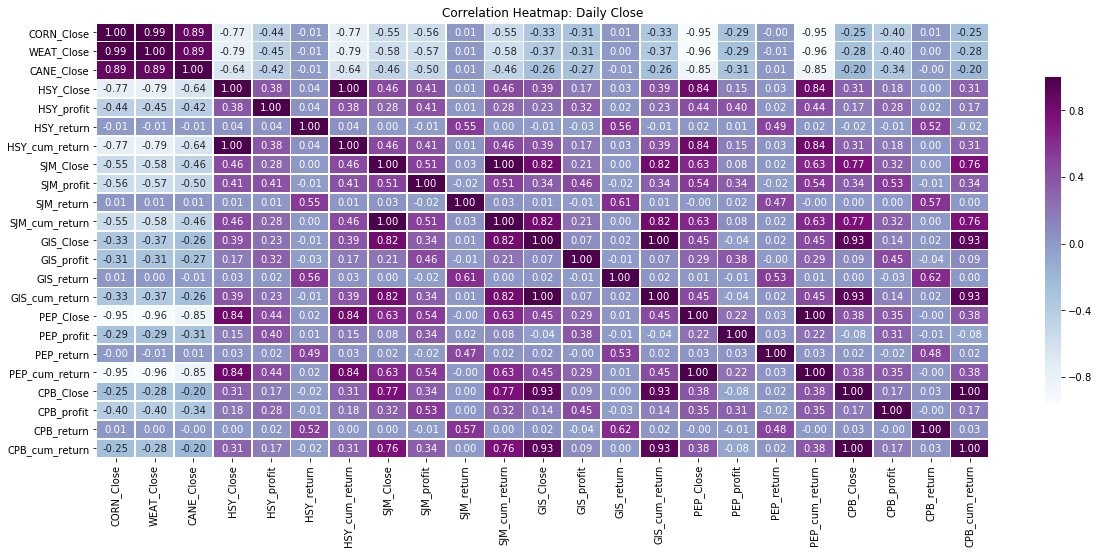

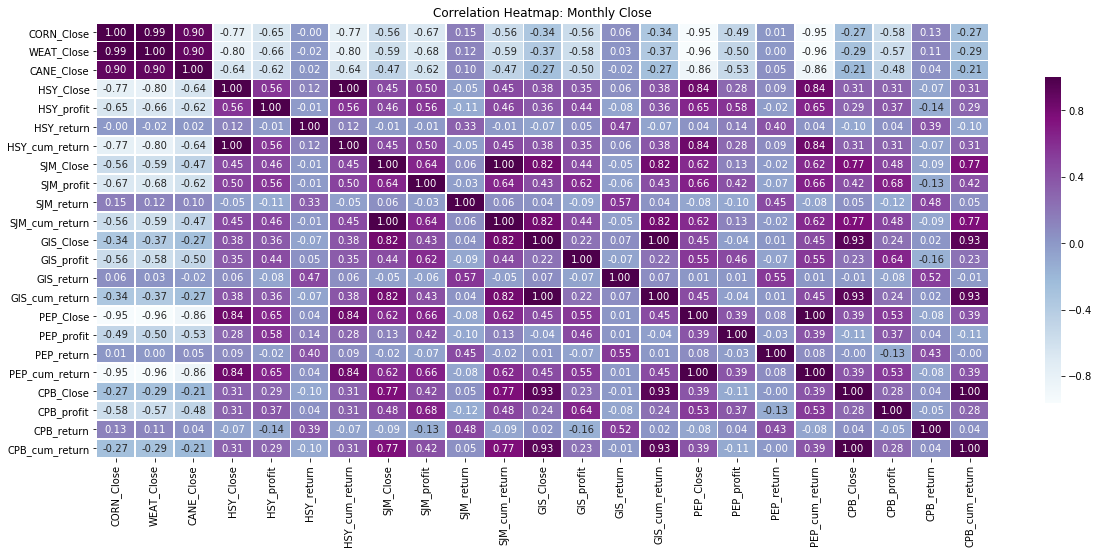

In [13]:
#correlation between daily stock_Close and company stocks

#negative moderate: CORN, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#negative high: WEAT
stock_per_change = data[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Daily Close')

#negative moderate: CORN, WEAT, CANE
#positive moderate: HSY, SJM, GIS, PEP, CPB
#correlation between monthly stock_Close and Temp_Anamoly
stock_per_change = data_month[['CORN_Close','WEAT_Close','CANE_Close','HSY_Close','HSY_profit','HSY_return','HSY_cum_return',
                         'SJM_Close','SJM_profit','SJM_return','SJM_cum_return',
                         'GIS_Close','GIS_profit','GIS_return','GIS_cum_return',
                         'PEP_Close','PEP_profit','PEP_return','PEP_cum_return',
                         'CPB_Close','CPB_profit','CPB_return','CPB_cum_return']]
plt.figure(figsize = (20,8))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Monthly Close')

### Covariance

In [14]:
#finding the covariance for all daily stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data['CORN_Close'])
b = array(data['WEAT_Close'])
c = array(data['CANE_Close'])
d = array(data['HSY_Close'])
e = array(data['SJM_Close'])
f = array(data['GIS_Close'])
g = array(data['PEP_Close'])
h = array(data['CPB_Close'])

i = array(data['HSY_profit'])
j = array(data['SJM_profit'])
k = array(data['GIS_profit'])
l = array(data['PEP_profit'])
m = array(data['CPB_profit'])

n = array(data['HSY_return'])
o = array(data['SJM_return'])
p = array(data['GIS_return'])
q = array(data['PEP_return'])
r = array(data['CPB_return'])

s = array(data['HSY_cum_return'])
t = array(data['SJM_cum_return'])
u = array(data['GIS_cum_return'])
v = array(data['PEP_cum_return'])
w = array(data['CPB_cum_return'])

print('Daily Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Daily Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close -138.34084056629888
Covariance of CORN_Close and HSY_profit -216809511.61783123
Covariance of CORN_Close and HSY_return 0.0013902505081727602
Covariance of CORN_Close and HSY_cum_return -2.280583710892339
SJM
Covariance of CORN_Close and SJM_Close -115.94602149349058
Covariance of CORN_Close and SJM_profit -277570957.97993034
Covariance of CORN_Close and SJM_return 0.004010085491591711
Covariance of CORN_Close and SJM_cum_return -1.499560446608798
GIS
Covariance of CORN_Close and GIS_Close -40.9424700893594
Covariance of CORN_Close and GIS_profit -223430184.363508
Covariance of CORN_Close and GIS_return 0.002678570287678322
Covariance of CORN_Close and GIS_cum_return -1.021992461884887
PEP
Covariance of CORN_Close and PEP_Close -170.72475499919437
Covariance of CORN_Close and PEP_profit -360371356.472933
Covariance of CORN_Close and PEP_return 0.0006182257765834759
Covariance of CORN_Close and 

In [15]:
#Covariance measures for WEAT_Close v company
print('Daily Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Daily Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close -81.52090754236394
Covariance of WEAT_Close and HSY_profit -127094283.88983802
Covariance of WEAT_Close and HSY_return 0.0006718853978285041
Covariance of WEAT_Close and HSY_cum_return -1.3438927584741471
SJM
Covariance of WEAT_Close and SJM_Close -69.4502284620225
Covariance of WEAT_Close and SJM_profit -163894422.51800883
Covariance of WEAT_Close and SJM_return 0.001975258038665761
Covariance of WEAT_Close and SJM_cum_return -0.8982181041497866
GIS
Covariance of WEAT_Close and GIS_Close -24.314948083552398
Covariance of WEAT_Close and GIS_profit -134570443.49721462
Covariance of WEAT_Close and GIS_return 0.0013739427869931813
Covariance of WEAT_Close and GIS_cum_return -0.6069417306351325
PEP
Covariance of WEAT_Close and PEP_Close -99.46580656973128
Covariance of WEAT_Close and PEP_profit -204526679.46619472
Covariance of WEAT_Close and PEP_return 0.0002908683355706429
Covariance of WEAT_Clos

In [16]:
#Covariance measures for CANE_Close v company
print('Daily Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Daily Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close -60.72593514418214
Covariance of CANE_Close and HSY_profit -80686279.59535931
Covariance of CANE_Close and HSY_return 0.0005684599964837971
Covariance of CANE_Close and HSY_cum_return -1.0010823842880714
SJM
Covariance of CANE_Close and SJM_Close -39.14008396611875
Covariance of CANE_Close and SJM_profit -99842106.34881094
Covariance of CANE_Close and SJM_return 0.001138489231654761
Covariance of CANE_Close and SJM_cum_return -0.5062090189600348
GIS
Covariance of CANE_Close and GIS_Close -11.901257249738773
Covariance of CANE_Close and GIS_profit -87058307.20454338
Covariance of CANE_Close and GIS_return 0.00019359356852526876
Covariance of CANE_Close and GIS_cum_return -0.29707526609018386
PEP
Covariance of CANE_Close and PEP_Close -69.77612569308172
Covariance of CANE_Close and PEP_profit -154889208.58880845
Covariance of CANE_Close and PEP_return 0.00040048038673397215
Covariance of CANE_Clo

In [17]:
#finding the covariance for all monthly stock close features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

a = array(data_month['CORN_Close'])
b = array(data_month['WEAT_Close'])
c = array(data_month['CANE_Close'])
d = array(data_month['HSY_Close'])
e = array(data_month['SJM_Close'])
f = array(data_month['GIS_Close'])
g = array(data_month['PEP_Close'])
h = array(data_month['CPB_Close'])

i = array(data_month['HSY_profit'])
j = array(data_month['SJM_profit'])
k = array(data_month['GIS_profit'])
l = array(data_month['PEP_profit'])
m = array(data_month['CPB_profit'])

n = array(data_month['HSY_return'])
o = array(data_month['SJM_return'])
p = array(data_month['GIS_return'])
q = array(data_month['PEP_return'])
r = array(data_month['CPB_return'])

s = array(data_month['HSY_cum_return'])
t = array(data_month['SJM_cum_return'])
u = array(data_month['GIS_cum_return'])
v = array(data_month['PEP_cum_return'])
w = array(data_month['CPB_cum_return'])

print('Monthly Covariance of CORN_Close and Company Stocks')
print('HSY')
covariance1a = cov(a,d)[0,1]
print('Covariance of CORN_Close and HSY_Close',covariance1a)
covariance1b = cov(a,i)[0,1]
print('Covariance of CORN_Close and HSY_profit',covariance1b)
covariance1c = cov(a,n)[0,1]
print('Covariance of CORN_Close and HSY_return',covariance1c)
covariance1d = cov(a,s)[0,1]
print('Covariance of CORN_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(a,e)[0,1]
print('Covariance of CORN_Close and SJM_Close',covariance2a)
covariance2b = cov(a,j)[0,1]
print('Covariance of CORN_Close and SJM_profit',covariance2b)
covariance2c = cov(a,o)[0,1]
print('Covariance of CORN_Close and SJM_return',covariance2c)
covariance2d = cov(a,t)[0,1]
print('Covariance of CORN_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(a,f)[0,1]
print('Covariance of CORN_Close and GIS_Close',covariance3a)
covariance3b = cov(a,k)[0,1]
print('Covariance of CORN_Close and GIS_profit',covariance3b)
covariance3c = cov(a,p)[0,1]
print('Covariance of CORN_Close and GIS_return',covariance3c)
covariance3d = cov(a,u)[0,1]
print('Covariance of CORN_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(a,g)[0,1]
print('Covariance of CORN_Close and PEP_Close',covariance4a)
covariance4b = cov(a,l)[0,1]
print('Covariance of CORN_Close and PEP_profit',covariance4b)
covariance4c = cov(a,q)[0,1]
print('Covariance of CORN_Close and PEP_return',covariance4c)
covariance4d = cov(a,v)[0,1]
print('Covariance of CORN_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(a,h)[0,1]
print('Covariance of CORN_Close and CPB_Close',covariance5a)
covariance5b = cov(a,m)[0,1]
print('Covariance of CORN_Close and CPB_profit',covariance5b)
covariance5c = cov(a,r)[0,1]
print('Covariance of CORN_Close and CPB_return',covariance5c)
covariance5d = cov(a,w)[0,1]
print('Covariance of CORN_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CORN_Close and Company Stocks
HSY
Covariance of CORN_Close and HSY_Close -139.9257771150918
Covariance of CORN_Close and HSY_profit -218281688.80480993
Covariance of CORN_Close and HSY_return 0.023814511454494015
Covariance of CORN_Close and HSY_cum_return -2.2533271569094335
SJM
Covariance of CORN_Close and SJM_Close -117.47825131715295
Covariance of CORN_Close and SJM_profit -281244028.86982906
Covariance of CORN_Close and SJM_return 0.07023293570328507
Covariance of CORN_Close and SJM_cum_return -1.43697649511411
GIS
Covariance of CORN_Close and GIS_Close -41.45661881468022
Covariance of CORN_Close and GIS_profit -226478451.8596663
Covariance of CORN_Close and GIS_return 0.04487741842356959
Covariance of CORN_Close and GIS_cum_return -0.9905287476890601
PEP
Covariance of CORN_Close and PEP_Close -172.9740819190508
Covariance of CORN_Close and PEP_profit -365535258.91022164
Covariance of CORN_Close and PEP_return 0.008495362691473657
Covariance of CORN_Close and

In [18]:
#Covariance measures for WEAT_Close v company
print('Monthly Covariance of WEAT_Close and Company Stocks')
print('HSY')
covariance1a = cov(b,d)[0,1]
print('Covariance of WEAT_Close and HSY_Close',covariance1a)
covariance1b = cov(b,i)[0,1]
print('Covariance of WEAT_Close and HSY_profit',covariance1b)
covariance1c = cov(b,n)[0,1]
print('Covariance of WEAT_Close and HSY_return',covariance1c)
covariance1d = cov(b,s)[0,1]
print('Covariance of WEAT_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(b,e)[0,1]
print('Covariance of WEAT_Close and SJM_Close',covariance2a)
covariance2b = cov(b,j)[0,1]
print('Covariance of WEAT_Close and SJM_profit',covariance2b)
covariance2c = cov(b,o)[0,1]
print('Covariance of WEAT_Close and SJM_return',covariance2c)
covariance2d = cov(b,t)[0,1]
print('Covariance of WEAT_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(b,f)[0,1]
print('Covariance of WEAT_Close and GIS_Close',covariance3a)
covariance3b = cov(b,k)[0,1]
print('Covariance of WEAT_Close and GIS_profit',covariance3b)
covariance3c = cov(b,p)[0,1]
print('Covariance of WEAT_Close and GIS_return',covariance3c)
covariance3d = cov(b,u)[0,1]
print('Covariance of WEAT_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(b,g)[0,1]
print('Covariance of WEAT_Close and PEP_Close',covariance4a)
covariance4b = cov(b,l)[0,1]
print('Covariance of WEAT_Close and PEP_profit',covariance4b)
covariance4c = cov(b,q)[0,1]
print('Covariance of WEAT_Close and PEP_return',covariance4c)
covariance4d = cov(b,v)[0,1]
print('Covariance of WEAT_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(b,h)[0,1]
print('Covariance of WEAT_Close and CPB_Close',covariance5a)
covariance5b = cov(b,m)[0,1]
print('Covariance of WEAT_Close and CPB_profit',covariance5b)
covariance5c = cov(b,r)[0,1]
print('Covariance of WEAT_Close and CPB_return',covariance5c)
covariance5d = cov(b,w)[0,1]
print('Covariance of WEAT_Close and CPB_cum_return',covariance5d)

Monthly Covariance of WEAT_Close and Company Stocks
HSY
Covariance of WEAT_Close and HSY_Close -82.411932310207
Covariance of WEAT_Close and HSY_profit -127507565.15319
Covariance of WEAT_Close and HSY_return 0.010924078047333493
Covariance of WEAT_Close and HSY_cum_return -1.327139637575347
SJM
Covariance of WEAT_Close and SJM_Close -70.35085024030225
Covariance of WEAT_Close and SJM_profit -165899973.34124163
Covariance of WEAT_Close and SJM_return 0.03277347245303766
Covariance of WEAT_Close and SJM_cum_return -0.8605211353860762
GIS
Covariance of WEAT_Close and GIS_Close -24.63709229008642
Covariance of WEAT_Close and GIS_profit -136705378.66777596
Covariance of WEAT_Close and GIS_return 0.021952009396584732
Covariance of WEAT_Close and GIS_cum_return -0.5886574658171947
PEP
Covariance of WEAT_Close and PEP_Close -100.74104263109513
Covariance of WEAT_Close and PEP_profit -207319261.3562856
Covariance of WEAT_Close and PEP_return 0.003921186452018409
Covariance of WEAT_Close and PE

In [19]:
#Covariance measures for CANE_Close v company
print('Monthly Covariance of CANE_Close and Company Stocks')
print('HSY')
covariance1a = cov(c,d)[0,1]
print('Covariance of CANE_Close and HSY_Close',covariance1a)
covariance1b = cov(c,i)[0,1]
print('Covariance of CANE_Close and HSY_profit',covariance1b)
covariance1c = cov(c,n)[0,1]
print('Covariance of CANE_Close and HSY_return',covariance1c)
covariance1d = cov(c,s)[0,1]
print('Covariance of CANE_Close and HSY_cum_return',covariance1d)

print('SJM')
covariance2a = cov(c,e)[0,1]
print('Covariance of CANE_Close and SJM_Close',covariance2a)
covariance2b = cov(c,j)[0,1]
print('Covariance of CANE_Close and SJM_profit',covariance2b)
covariance2c = cov(c,o)[0,1]
print('Covariance of CANE_Close and SJM_return',covariance2c)
covariance2d = cov(c,t)[0,1]
print('Covariance of CANE_Close and SJM_cum_return',covariance2d)

print('GIS')
covariance3a = cov(c,f)[0,1]
print('Covariance of CANE_Close and GIS_Close',covariance3a)
covariance3b = cov(c,k)[0,1]
print('Covariance of CANE_Close and GIS_profit',covariance3b)
covariance3c = cov(c,p)[0,1]
print('Covariance of CANE_Close and GIS_return',covariance3c)
covariance3d = cov(c,u)[0,1]
print('Covariance of CANE_Close and GIS_cum_return',covariance3d)

print('PEP')
covariance4a = cov(c,g)[0,1]
print('Covariance of CANE_Close and PEP_Close',covariance4a)
covariance4b = cov(c,l)[0,1]
print('Covariance of CANE_Close and PEP_profit',covariance4b)
covariance4c = cov(c,q)[0,1]
print('Covariance of CANE_Close and PEP_return',covariance4c)
covariance4d = cov(c,v)[0,1]
print('Covariance of CANE_Close and PEP_cum_return',covariance4d)

print('CPB')
covariance5a = cov(c,h)[0,1]
print('Covariance of CANE_Close and CPB_Close',covariance5a)
covariance5b = cov(c,m)[0,1]
print('Covariance of CANE_Close and CPB_profit',covariance5b)
covariance5c = cov(c,r)[0,1]
print('Covariance of CANE_Close and CPB_return',covariance5c)
covariance5d = cov(c,w)[0,1]
print('Covariance of CANE_Close and CPB_cum_return',covariance5d)

Monthly Covariance of CANE_Close and Company Stocks
HSY
Covariance of CANE_Close and HSY_Close -61.3978401205173
Covariance of CANE_Close and HSY_profit -82302873.9480775
Covariance of CANE_Close and HSY_return 0.007489002043762219
Covariance of CANE_Close and HSY_cum_return -0.9887343373862423
SJM
Covariance of CANE_Close and SJM_Close -39.817934558257406
Covariance of CANE_Close and SJM_profit -101695064.85002534
Covariance of CANE_Close and SJM_return 0.013737568141872459
Covariance of CANE_Close and SJM_cum_return -0.48704705256242997
GIS
Covariance of CANE_Close and GIS_Close -12.106204385929487
Covariance of CANE_Close and GIS_profit -89323714.02815771
Covariance of CANE_Close and GIS_return -0.0011500698062298957
Covariance of CANE_Close and GIS_cum_return -0.28925522178417984
PEP
Covariance of CANE_Close and PEP_Close -70.69561994885484
Covariance of CANE_Close and PEP_profit -156534897.7409692
Covariance of CANE_Close and PEP_return 0.0024020581961953407
Covariance of CANE_Clo

### Granger Causality

In [13]:
#evaluation if the daily features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data[['CORN_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CORN_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CORN_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['CORN_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CORN_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data[['CORN_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CORN_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3680  , p=0.2423  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1.3701  , p=0.2418  , df=1
likelihood ratio test: chi2=1.3696  , p=0.2419  , df=1
parameter F test:         F=1.3680  , p=0.2423  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6590  , p=0.1906  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=3.3263  , p=0.1895  , df=2
likelihood ratio test: chi2=3.3235  , p=0.1898  , df=2
parameter F test:         F=1.6590  , p=0.1906  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8632  , p=0.1338  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=5.6090  , p=0.1323  , df=3
likelihood ratio test: chi2=5.6012  , p=0.1327  , df=3
parameter F test:         F=1.8632  , p=0.1338  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5298  , p=0.

In [14]:
#evaluation if the daily features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data[['WEAT_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['WEAT_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['WEAT_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['WEAT_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['WEAT_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data[['WEAT_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['WEAT_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['WEAT_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['WEAT_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['WEAT_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data[['WEAT_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data[['WEAT_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['WEAT_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['WEAT_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['WEAT_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data[['WEAT_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['WEAT_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['WEAT_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['WEAT_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['WEAT_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3873  , p=0.5338  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=0.3879  , p=0.5334  , df=1
likelihood ratio test: chi2=0.3878  , p=0.5334  , df=1
parameter F test:         F=0.3873  , p=0.5338  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1650  , p=0.8479  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=0.3308  , p=0.8476  , df=2
likelihood ratio test: chi2=0.3307  , p=0.8476  , df=2
parameter F test:         F=0.1650  , p=0.8479  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1682  , p=0.9178  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=0.5065  , p=0.9175  , df=3
likelihood ratio test: chi2=0.5064  , p=0.9175  , df=3
parameter F test:         F=0.1682  , p=0.9178  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2938  , p=0.

In [19]:
#evaluation if the daily features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data[['CANE_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data[['CANE_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data[['CANE_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data[['CANE_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data[['CANE_Close','HSY_return']], maxlag=4)) #reject null
print('SJM_return',grangercausalitytests(data[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data[['CANE_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3273  , p=0.2494  , df_denom=2008, df_num=1
ssr based chi2 test:   chi2=1.3293  , p=0.2489  , df=1
likelihood ratio test: chi2=1.3288  , p=0.2490  , df=1
parameter F test:         F=1.3273  , p=0.2494  , df_denom=2008, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.1253  , p=0.0441  , df_denom=2005, df_num=2
ssr based chi2 test:   chi2=6.2662  , p=0.0436  , df=2
likelihood ratio test: chi2=6.2565  , p=0.0438  , df=2
parameter F test:         F=3.1253  , p=0.0441  , df_denom=2005, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.1376  , p=0.0935  , df_denom=2002, df_num=3
ssr based chi2 test:   chi2=6.4353  , p=0.0922  , df=3
likelihood ratio test: chi2=6.4250  , p=0.0927  , df=3
parameter F test:         F=2.1376  , p=0.0935  , df_denom=2002, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0091  , p=0.

In [20]:
#evaluation if the monthly features for company stocks is caused by CORN_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CORN_Close
print('HSY_Close',grangercausalitytests(data_month[['CORN_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['CORN_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CORN_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CORN_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['CORN_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CORN_Close
print('HSY_profit',grangercausalitytests(data_month[['CORN_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CORN_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CORN_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CORN_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['CORN_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CORN_Close
print('HSY_return',grangercausalitytests(data_month[['CORN_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['CORN_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CORN_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CORN_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CORN_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CORN_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CORN_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['CORN_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CORN_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CORN_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['CORN_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5554  , p=0.2155  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=1.6062  , p=0.2050  , df=1
likelihood ratio test: chi2=1.5927  , p=0.2069  , df=1
parameter F test:         F=1.5554  , p=0.2155  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0929  , p=0.3397  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=2.3087  , p=0.3153  , df=2
likelihood ratio test: chi2=2.2808  , p=0.3197  , df=2
parameter F test:         F=1.0929  , p=0.3397  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5350  , p=0.0621  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=8.2242  , p=0.0416  , df=3
likelihood ratio test: chi2=7.8806  , p=0.0485  , df=3
parameter F test:         F=2.5350  , p=0.0621  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0023  , p=0.1017  , df_d

In [22]:
#evaluation if the monthly features for company stocks is caused by WEAT_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by WEAT_Close
print('HSY_Close',grangercausalitytests(data_month[['WEAT_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['WEAT_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['WEAT_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['WEAT_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['WEAT_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by WEAT_Close
print('HSY_profit',grangercausalitytests(data_month[['WEAT_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['WEAT_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['WEAT_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['WEAT_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['WEAT_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by WEAT_Close
print('HSY_return',grangercausalitytests(data_month[['WEAT_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['WEAT_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['WEAT_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['WEAT_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['WEAT_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by WEAT_Close
print('HSY_cum_return',grangercausalitytests(data_month[['WEAT_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['WEAT_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['WEAT_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['WEAT_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['WEAT_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2064  , p=0.6506  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.2132  , p=0.6443  , df=1
likelihood ratio test: chi2=0.2129  , p=0.6445  , df=1
parameter F test:         F=0.2064  , p=0.6506  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3232  , p=0.7246  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.6828  , p=0.7108  , df=2
likelihood ratio test: chi2=0.6803  , p=0.7116  , df=2
parameter F test:         F=0.3232  , p=0.7246  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0225  , p=0.3868  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=3.3171  , p=0.3453  , df=3
likelihood ratio test: chi2=3.2593  , p=0.3533  , df=3
parameter F test:         F=1.0225  , p=0.3868  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7566  , p=0.5565  , df_d

In [23]:
#evaluation if the monthly features for company stocks is caused by CANE_Close through Granger Causality

#null hyp: Company_Close is not Granger caused by CANE_Close
print('HSY_Close',grangercausalitytests(data_month[['CANE_Close','HSY_Close']], maxlag=4)) #accept null
print('SJM_Close',grangercausalitytests(data_month[['CANE_Close','SJM_Close']], maxlag=4)) #accept null
print('GIS_Close',grangercausalitytests(data_month[['CANE_Close','GIS_Close']], maxlag=4)) #accept null
print('PEP_Close',grangercausalitytests(data_month[['CANE_Close','PEP_Close']], maxlag=4)) #accept null
print('CPB_Close',grangercausalitytests(data_month[['CANE_Close','CPB_Close']], maxlag=4)) #accept null

#null hyp: Company_profit is not Granger caused by CANE_Close
print('HSY_profit',grangercausalitytests(data_month[['CANE_Close','HSY_profit']], maxlag=4)) #accept null
print('SJM_profit',grangercausalitytests(data_month[['CANE_Close','SJM_profit']], maxlag=4)) #accept null
print('GIS_profit',grangercausalitytests(data_month[['CANE_Close','GIS_profit']], maxlag=4)) #accept null
print('PEP_profit',grangercausalitytests(data_month[['CANE_Close','PEP_profit']], maxlag=4)) #accept null
print('CPB_profit',grangercausalitytests(data_month[['CANE_Close','CPB_profit']], maxlag=4)) #accept null

#null hyp: Company_return is not Granger caused by CANE_Close
print('HSY_return',grangercausalitytests(data_month[['CANE_Close','HSY_return']], maxlag=4)) #accept null
print('SJM_return',grangercausalitytests(data_month[['CANE_Close','SJM_return']], maxlag=4)) #accept null
print('GIS_return',grangercausalitytests(data_month[['CANE_Close','GIS_return']], maxlag=4)) #accept null
print('PEP_return',grangercausalitytests(data_month[['CANE_Close','PEP_return']], maxlag=4)) #accept null
print('CPB_return',grangercausalitytests(data_month[['CANE_Close','CPB_return']], maxlag=4)) #accept null

#null hyp: Company_cum_return is not Granger caused by CANE_Close
print('HSY_cum_return',grangercausalitytests(data_month[['CANE_Close','HSY_cum_return']], maxlag=4)) #accept null
print('SJM_cum_return',grangercausalitytests(data_month[['CANE_Close','SJM_cum_return']], maxlag=4)) #accept null
print('GIS_cum_return',grangercausalitytests(data_month[['CANE_Close','GIS_cum_return']], maxlag=4)) #accept null
print('PEP_cum_return',grangercausalitytests(data_month[['CANE_Close','PEP_cum_return']], maxlag=4)) #accept null
print('CPB_cum_return',grangercausalitytests(data_month[['CANE_Close','CPB_cum_return']], maxlag=4)) #accept null


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3419  , p=0.5602  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=0.3530  , p=0.5524  , df=1
likelihood ratio test: chi2=0.3524  , p=0.5528  , df=1
parameter F test:         F=0.3419  , p=0.5602  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2597  , p=0.7719  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=0.5486  , p=0.7601  , df=2
likelihood ratio test: chi2=0.5470  , p=0.7607  , df=2
parameter F test:         F=0.2597  , p=0.7719  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8440  , p=0.1452  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=5.9821  , p=0.1125  , df=3
likelihood ratio test: chi2=5.7976  , p=0.1219  , df=3
parameter F test:         F=1.8440  , p=0.1452  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9770  , p=0.1056  , df_d

# Research Question 4
**4. Does any volatility exist in the data that can associated with climate anomalies?**

### Volatility

**Standard Deviation**

In [ ]:
#take monthly standard deviation from daily dataset
#add to results to monthly dataset
#see if there is a relationship with Temp_Anamoly via correlation, covariance, granger causality

In [42]:
#take monthly standard deviation from daily dataset
#https://stackoverflow.com/questions/47481473/creating-sum-mean-and-standard-deviation-for-each-month-from-time-series-in-a-d
new_df = data_target.groupby([data_target.index.year, data_target.index.month]).agg(['std'])
new_df.index.set_names(['Year', 'Month'], inplace = True)
new_df.reset_index(inplace = True)
new_df

,Year,Month,Temp_Anamoly,CORN_Close,WEAT_Close,CANE_Close,HSY_Close,SJM_Close,GIS_Close,PEP_Close,...,PEP_return,CPB_return,CORN_cum_return,WEAT_cum_return,CANE_cum_return,HSY_cum_return,SJM_cum_return,GIS_cum_return,PEP_cum_return,CPB_cum_return
,,,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,std
0,2012,1,0.0,1.217874,0.627462,0.430609,0.368183,1.378270,0.354321,0.712832,...,0.007278,0.010606,0.028501,0.027613,0.018480,0.006070,0.017826,0.008844,0.010790,0.013453
1,2012,2,0.0,0.439654,0.612358,0.493211,0.556372,2.984618,0.694188,1.586851,...,0.009347,0.008137,0.010289,0.026949,0.021167,0.009172,0.038601,0.017328,0.024021,0.022648
2,2012,3,0.0,0.982019,0.425608,0.500570,0.599204,2.226430,0.334230,1.346864,...,0.004825,0.006371,0.022982,0.018730,0.021483,0.009878,0.028795,0.008343,0.020388,0.007268
3,2012,4,0.0,0.827865,0.463357,0.988610,2.369561,0.993275,0.348916,0.571954,...,0.006251,0.007238,0.019374,0.020392,0.042428,0.039063,0.012846,0.008710,0.008658,0.009601
4,2012,5,0.0,0.754831,0.707969,0.581131,0.648491,0.931479,0.380601,1.001995,...,0.008679,0.007435,0.017665,0.031156,0.024940,0.010691,0.012047,0.009500,0.015168,0.025834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2019,8,0.0,0.558342,0.120505,0.117676,3.133896,3.795708,0.800742,3.270709,...,0.011649,0.015967,0.013067,0.005303,0.005050,0.051663,0.049091,0.019988,0.049510,0.026737
92,2019,9,0.0,0.220212,0.104358,0.121112,3.606478,1.457165,0.442890,1.081162,...,0.008421,0.010826,0.005154,0.004593,0.005198,0.059454,0.018846,0.011055,0.016366,0.024292
93,2019,10,0.0,0.123701,0.113491,0.098221,4.932010,0.795263,1.570310,1.153912,...,0.010422,0.009099,0.002895,0.004995,0.004215,0.081305,0.010285,0.039198,0.017467,0.015955


In [65]:
#add standard deviation results to monthly dataset
data_month['StDev_Temp_Anamoly'] = new_df['Temp_Anamoly'].values
data_month['StDev_CORN_Close'] = new_df['CORN_Close'].values
data_month['StDev_WEAT_Close'] = new_df['WEAT_Close'].values
data_month['StDev_CANE_Close'] = new_df['CANE_Close'].values
data_month['StDev_HSY_Close'] = new_df['HSY_Close'].values
data_month['StDev_SJM_Close'] = new_df['SJM_Close'].values
data_month['StDev_GIS_Close'] = new_df['GIS_Close'].values
data_month['StDev_PEP_Close'] = new_df['PEP_Close'].values
data_month['StDev_CPB_Close'] = new_df['CPB_Close'].values

data_month['StDev_CORN_profit'] = new_df['CORN_profit'].values
data_month['StDev_WEAT_profit'] = new_df['WEAT_profit'].values
data_month['StDev_CANE_profit'] = new_df['CANE_profit'].values
data_month['StDev_HSY_profit'] = new_df['HSY_profit'].values
data_month['StDev_SJM_profit'] = new_df['SJM_profit'].values
data_month['StDev_GIS_profit'] = new_df['GIS_profit'].values
data_month['StDev_PEP_profit'] = new_df['PEP_profit'].values
data_month['StDev_CPB_profit'] = new_df['CPB_profit'].values

data_month['StDev_CORN_return'] = new_df['CORN_return'].values
data_month['StDev_WEAT_return'] = new_df['WEAT_return'].values
data_month['StDev_CANE_return'] = new_df['CANE_return'].values
data_month['StDev_HSY_return'] = new_df['HSY_return'].values
data_month['StDev_SJM_return'] = new_df['SJM_return'].values
data_month['StDev_GIS_return'] = new_df['GIS_return'].values
data_month['StDev_PEP_return'] = new_df['PEP_return'].values
data_month['StDev_CPB_return'] = new_df['CPB_return'].values

data_month['StDev_CORN_cum_return'] = new_df['CORN_cum_return'].values
data_month['StDev_WEAT_cum_return'] = new_df['WEAT_cum_return'].values
data_month['StDev_CANE_cum_return'] = new_df['CANE_cum_return'].values
data_month['StDev_HSY_cum_return'] = new_df['HSY_cum_return'].values
data_month['StDev_SJM_cum_return'] = new_df['SJM_cum_return'].values
data_month['StDev_GIS_cum_return'] = new_df['GIS_cum_return'].values
data_month['StDev_PEP_cum_return'] = new_df['PEP_cum_return'].values
data_month['StDev_CPB_cum_return'] = new_df['CPB_cum_return'].values
           
data_month.head()

,Year,Temp_Anamoly,Avg_Temp_F,Avg_Precip_In,CORN_Open,CORN_High,CORN_Low,CORN_Close,CORN_Volume,WEAT_Open,...,StDev_CPB_return,StDev_CORN_cum_return,StDev_WEAT_cum_return,StDev_CANE_cum_return,StDev_HSY_cum_return,StDev_SJM_cum_return,StDev_GIS_cum_return,StDev_PEP_cum_return,StDev_CPB_cum_return,StDev_Temp_Anamoly
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-31,2012,0.50,36.12,2.09,40.720000,40.960000,40.324000,40.692000,80610.000000,21.540000,...,0.010606,0.028501,0.027613,0.018480,0.006070,0.017826,0.008844,0.010790,0.013453,0.0
2012-02-29,2012,0.49,37.51,1.85,40.672500,40.953500,40.368000,40.683000,37830.000000,21.396000,...,0.008137,0.010289,0.026949,0.021167,0.009172,0.038601,0.017328,0.024021,0.022648,0.0
2012-03-31,2012,0.57,50.41,2.87,40.433182,40.689545,40.016364,40.267727,69286.363636,21.106818,...,0.006371,0.022982,0.018730,0.021483,0.009878,0.028795,0.008343,0.020388,0.007268,0.0
2012-04-30,2012,0.71,54.68,2.23,38.630000,38.854500,38.233500,38.486500,43535.000000,20.317000,...,0.007238,0.019374,0.020392,0.042428,0.039063,0.012846,0.008710,0.008658,0.009601,0.0
2012-05-31,2012,0.77,63.45,2.50,36.822273,37.153182,36.450455,36.770909,34081.818182,19.753182,...,0.007435,0.017665,0.031156,0.024940,0.010691,0.012047,0.009500,0.015168,0.025834,0.0


**Correlation**

Text(0.5,1,'Correlation Heatmap: Temp_Anamoly v Standard Deviation')

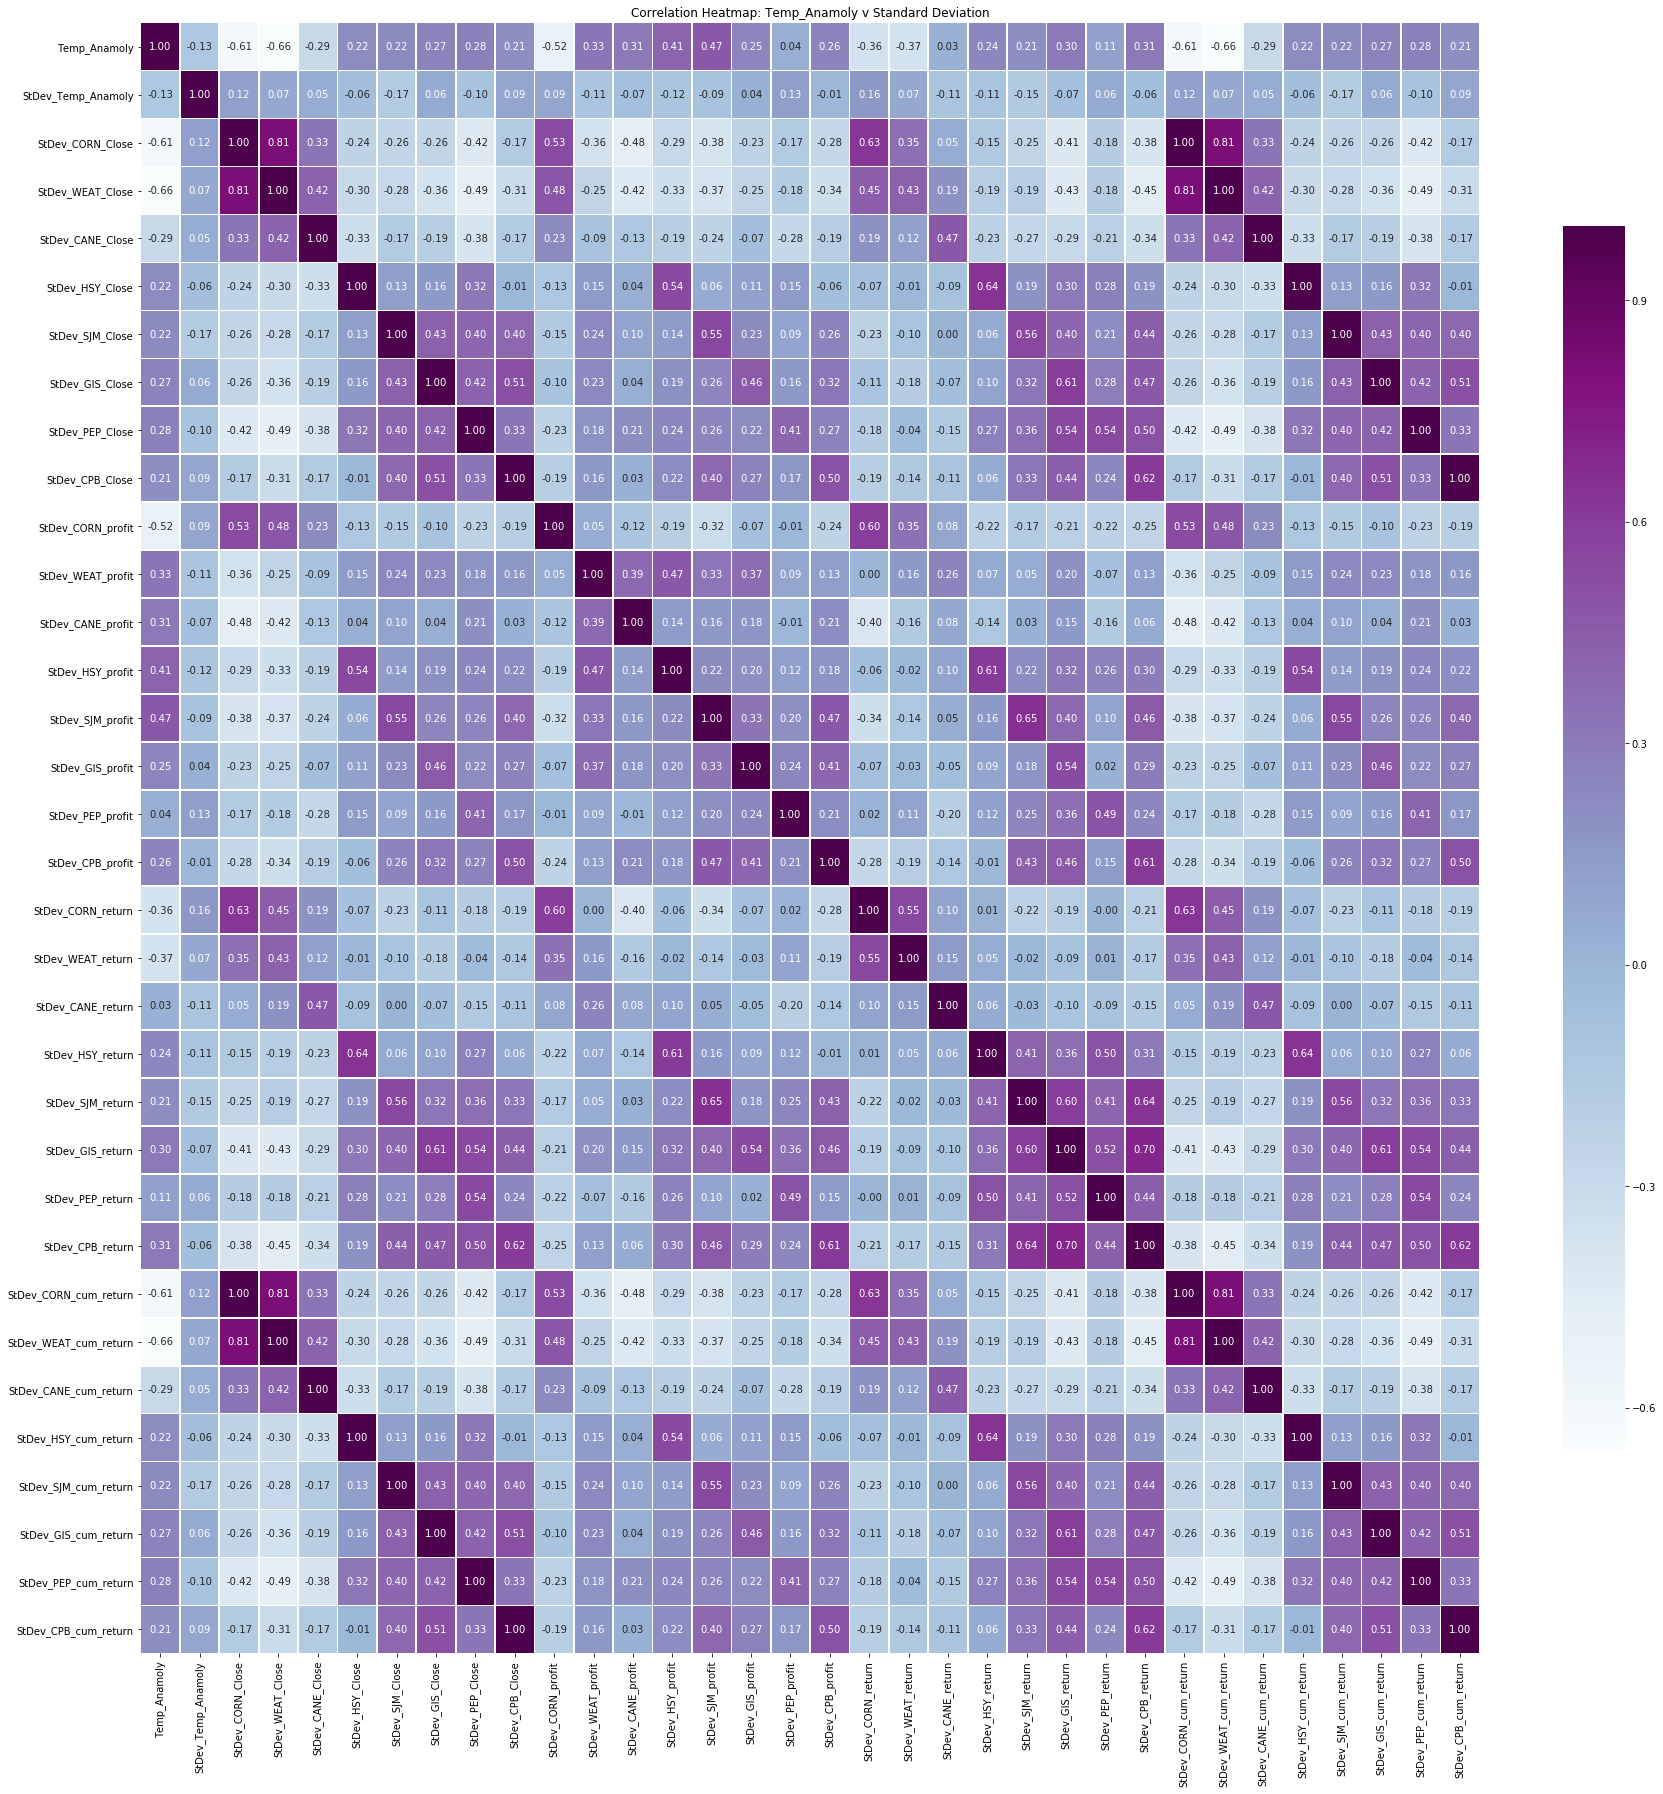

In [76]:
#see if there is a relationship with Temp_Anamoly via correlation, covariance, granger causality

#correlation between daily stock_Close and company stocks

stock_per_change = data_month[['Temp_Anamoly','StDev_Temp_Anamoly',
                        'StDev_CORN_Close','StDev_WEAT_Close','StDev_CANE_Close','StDev_HSY_Close','StDev_SJM_Close','StDev_GIS_Close', 'StDev_PEP_Close', 'StDev_CPB_Close',
                        'StDev_CORN_profit','StDev_WEAT_profit','StDev_CANE_profit','StDev_HSY_profit','StDev_SJM_profit','StDev_GIS_profit', 'StDev_PEP_profit', 'StDev_CPB_profit',
                        'StDev_CORN_return','StDev_WEAT_return','StDev_CANE_return','StDev_HSY_return','StDev_SJM_return','StDev_GIS_return', 'StDev_PEP_return', 'StDev_CPB_return',
                        'StDev_CORN_cum_return','StDev_WEAT_cum_return','StDev_CANE_cum_return','StDev_HSY_cum_return','StDev_SJM_cum_return','StDev_GIS_cum_return', 'StDev_PEP_cum_return', 'StDev_CPB_cum_return']]
plt.figure(figsize = (30,30))
#Created a heatmap using Seaborn to display the correlation based on 'Spearman' method-annotation so that the numbers appear in each box
display = sns.heatmap(stock_per_change.corr(method = 'spearman'), annot=True, fmt='.2f', cmap='BuPu', linewidth=.75, cbar_kws={'shrink': .75})
#Created a title
plt.title('Correlation Heatmap: Temp_Anamoly v Standard Deviation')

**Covariance**

In [74]:
#finding the covariance for Temp_Anamoly and standard deviation features
#Covariance measures for CORN_Close v company
#covariance is above zero for all pairs (per rounding)--supports that variables most likely change together 

temp = array(data_month['Temp_Anamoly'])

a_std = array(data_month['StDev_CORN_Close'])
b_std = array(data_month['StDev_WEAT_Close'])
c_std = array(data_month['StDev_CANE_Close'])
d_std = array(data_month['StDev_HSY_Close'])
e_std = array(data_month['StDev_SJM_Close'])
f_std = array(data_month['StDev_GIS_Close'])
g_std = array(data_month['StDev_PEP_Close'])
h_std = array(data_month['StDev_CPB_Close'])

i_std = array(data_month['StDev_CORN_profit'])
j_std = array(data_month['StDev_WEAT_profit'])
k_std = array(data_month['StDev_CANE_profit'])
l_std = array(data_month['StDev_HSY_profit'])
m_std = array(data_month['StDev_SJM_profit'])
n_std = array(data_month['StDev_GIS_profit'])
o_std = array(data_month['StDev_PEP_profit'])
p_std = array(data_month['StDev_CPB_profit'])

q_std = array(data_month['StDev_CORN_return'])
r_std = array(data_month['StDev_WEAT_return'])
s_std = array(data_month['StDev_CANE_return'])
t_std = array(data_month['StDev_HSY_return'])
u_std = array(data_month['StDev_SJM_return'])
v_std = array(data_month['StDev_GIS_return'])
w_std = array(data_month['StDev_PEP_return'])
x_std = array(data_month['StDev_CPB_return'])

y_std = array(data_month['StDev_CORN_cum_return'])
z_std = array(data_month['StDev_WEAT_cum_return'])
aa_std = array(data_month['StDev_CANE_cum_return'])
bb_std = array(data_month['StDev_HSY_cum_return'])
cc_std = array(data_month['StDev_SJM_cum_return'])
dd_std = array(data_month['StDev_GIS_cum_return'])
ee_std = array(data_month['StDev_PEP_cum_return'])
ff_std = array(data_month['StDev_CPB_cum_return'])

print('StDev_Close')
covariance1_std = cov(temp,a_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_Close',covariance1_std)
covariance2_std = cov(temp,b_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_Close',covariance2_std)
covariance3_std = cov(temp,c_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_Close',covariance3_std)
covariance4_std = cov(temp,d_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_Close',covariance4_std)
covariance5_std = cov(temp,e_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_Close',covariance5_std)
covariance6_std = cov(temp,f_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_Close',covariance6_std)
covariance7_std = cov(temp,g_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_Close',covariance7_std)
covariance8_std = cov(temp,h_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_Close',covariance8_std)

print('StDev_profit')
covariance9_std = cov(temp,i_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_profit',covariance9_std)
covariance10_std = cov(temp,j_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_profit',covariance10_std)
covariance11_std = cov(temp,k_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_profit',covariance11_std)
covariance12_std = cov(temp,l_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_profit',covariance12_std)
covariance13_std = cov(temp,m_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_profit',covariance13_std)
covariance14_std = cov(temp,n_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_profit',covariance14_std)
covariance15_std = cov(temp,o_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_profit',covariance15_std)
covariance16_std = cov(temp,p_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_profit',covariance16_std)

print('StDev_return')
covariance17_std = cov(temp,q_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_return',covariance17_std)
covariance18_std = cov(temp,r_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_return',covariance18_std)
covariance19_std = cov(temp,s_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_return',covariance19_std)
covariance20_std = cov(temp,t_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_return',covariance20_std)
covariance21_std = cov(temp,u_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_return',covariance21_std)
covariance22_std = cov(temp,v_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_return',covariance22_std)
covariance23_std = cov(temp,w_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_return',covariance23_std)
covariance24_std = cov(temp,x_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_return',covariance24_std)

print('StDev_return')
covariance25_std = cov(temp,y_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CORN_cum_return',covariance25_std)
covariance26_std = cov(temp,z_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_WEAT_cum_return',covariance26_std)
covariance27_std = cov(temp,aa_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CANE_cum_return',covariance27_std)
covariance28_std = cov(temp,bb_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_HSY_cum_return',covariance28_std)
covariance29_std = cov(temp,cc_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_SJM_cum_return',covariance29_std)
covariance30_std = cov(temp,dd_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_GIS_cum_return',covariance30_std)
covariance31_std = cov(temp,ee_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_PEP_cum_return',covariance31_std)
covariance32_std = cov(temp,ff_std)[0,1]
print('Covariance of Temp_Anamoly and StDev_CPB_cum_return',covariance32_std)

StDev_Close
Covariance of Temp_Anamoly and StDev_CORN_Close -0.03842536885651164
Covariance of Temp_Anamoly and StDev_WEAT_Close -0.020087175086349048
Covariance of Temp_Anamoly and StDev_CANE_Close -0.006798444922639166
Covariance of Temp_Anamoly and StDev_HSY_Close 0.02647773596964029
Covariance of Temp_Anamoly and StDev_SJM_Close 0.0338996638768959
Covariance of Temp_Anamoly and StDev_GIS_Close 0.021091044125854993
Covariance of Temp_Anamoly and StDev_PEP_Close 0.025025519438019672
Covariance of Temp_Anamoly and StDev_CPB_Close 0.02143367300559505
StDev_profit
Covariance of Temp_Anamoly and StDev_CORN_profit -89924.59782109567
Covariance of Temp_Anamoly and StDev_WEAT_profit 11669.328114470574
Covariance of Temp_Anamoly and StDev_CANE_profit 7408.050373393378
Covariance of Temp_Anamoly and StDev_HSY_profit 1034890.672977322
Covariance of Temp_Anamoly and StDev_SJM_profit 1811124.773626042
Covariance of Temp_Anamoly and StDev_GIS_profit 1579813.3229406134
Covariance of Temp_Anamoly a

**Granger Causality**

In [75]:
#evaluation if the standard deviation (volatility) is caused by Temp_Anamoly through Granger Causality
#answer is acept null unless otherwise stated

#null hyp: StDev_Stock_Close is not Granger caused by Temp_Anamoly
print('StDev_CORN_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_Close']], maxlag=4))
print('StDev_WEAT_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_Close']], maxlag=4)) #reject
print('StDev_CANE_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_Close']], maxlag=4)) 
print('StDev_HSY_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_Close']], maxlag=4)) 
print('StDev_SJM_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_Close']], maxlag=4)) 
print('StDev_GIS_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_Close']], maxlag=4)) 
print('StDev_PEP_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_Close']], maxlag=4)) 
print('StDev_CPB_Close',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_Close']], maxlag=4)) 

#null hyp: StDev_Stock_profit is not Granger caused by Temp_Anamoly
print('StDev_CORN_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_profit']], maxlag=4)) 
print('StDev_WEAT_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_profit']], maxlag=4)) 
print('StDev_CANE_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_profit']], maxlag=4)) 
print('StDev_HSY_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_profit']], maxlag=4)) 
print('StDev_SJM_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_profit']], maxlag=4)) 
print('StDev_GIS_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_profit']], maxlag=4)) 
print('StDev_PEP_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_profit']], maxlag=4)) 
print('StDev_CPB_profit',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_profit']], maxlag=4)) 

#null hyp: StDev_Stock_return is not Granger caused by Temp_Anamoly
print('StDev_CORN_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_return']], maxlag=4)) 
print('StDev_WEAT_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_return']], maxlag=4)) 
print('StDev_CANE_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_return']], maxlag=4)) 
print('StDev_HSY_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_return']], maxlag=4)) 
print('StDev_SJM_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_return']], maxlag=4)) 
print('StDev_GIS_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_return']], maxlag=4)) #reject
print('StDev_PEP_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_return']], maxlag=4)) #reject
print('StDev_CPB_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_return']], maxlag=4)) 

#null hyp: StDev_Stock_cum_return is not Granger caused by Temp_Anamoly
print('StDev_CORN_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CORN_cum_return']], maxlag=4)) 
print('StDev_WEAT_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_WEAT_cum_return']], maxlag=4)) #reject
print('StDev_CANE_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CANE_cum_return']], maxlag=4)) 
print('StDev_HSY_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_HSY_cum_return']], maxlag=4)) 
print('StDev_SJM_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_SJM_cum_return']], maxlag=4)) 
print('StDev_GIS_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_GIS_cum_return']], maxlag=4)) 
print('StDev_PEP_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_PEP_cum_return']], maxlag=4)) 
print('StDev_CPB_cum_return',grangercausalitytests(data_month[['Temp_Anamoly','StDev_CPB_cum_return']], maxlag=4)) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3765  , p=0.0694  , df_denom=92, df_num=1
ssr based chi2 test:   chi2=3.4866  , p=0.0619  , df=1
likelihood ratio test: chi2=3.4241  , p=0.0643  , df=1
parameter F test:         F=3.3765  , p=0.0694  , df_denom=92, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7289  , p=0.1834  , df_denom=89, df_num=2
ssr based chi2 test:   chi2=3.6521  , p=0.1610  , df=2
likelihood ratio test: chi2=3.5830  , p=0.1667  , df=2
parameter F test:         F=1.7289  , p=0.1834  , df_denom=89, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1569  , p=0.3310  , df_denom=86, df_num=3
ssr based chi2 test:   chi2=3.7531  , p=0.2894  , df=3
likelihood ratio test: chi2=3.6793  , p=0.2982  , df=3
parameter F test:         F=1.1569  , p=0.3310  , df_denom=86, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1253  , p=0.3502  , df_d

**Bollinger Bands**


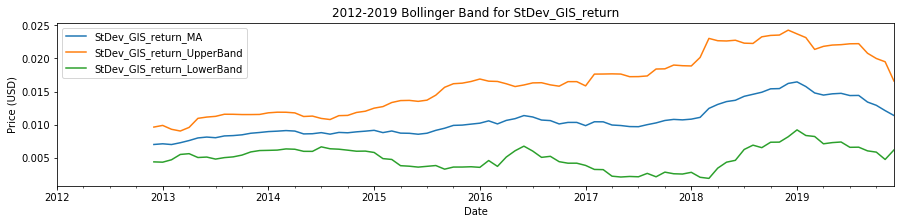

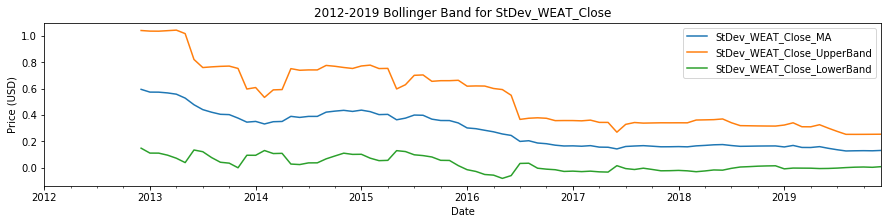

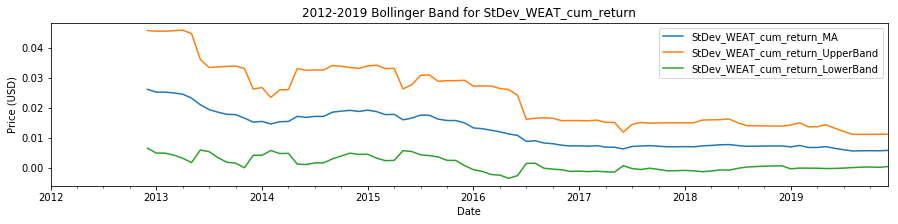

In [82]:
#Bollinger standard deviation features that showed relationship with Temp_Anamoly
#source: https://medium.com/python-data/setting-up-a-bollinger-band-with-python-28941e2fa300

#set moving average for StDev_GIS_return
data_month['StDev_GIS_return_MA'] = data_month['StDev_GIS_return'].rolling(12).mean()
#set standard deviation for sample
GIS_return_STD = data_month['StDev_GIS_return'].rolling(12).std() 
#set upper and lower band
data_month['StDev_GIS_return_UpperBand'] = data_month['StDev_GIS_return_MA'] + (GIS_return_STD * 2)
data_month['StDev_GIS_return_LowerBand'] = data_month['StDev_GIS_return_MA'] - (GIS_return_STD * 2)
#Plot Bollinger Band
data_month[['StDev_GIS_return_MA', 'StDev_GIS_return_UpperBand', 'StDev_GIS_return_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for StDev_GIS_return')
plt.ylabel('Price (USD)')
plt.show()

#set moving average for StDev_WEAT_Close
data_month['StDev_WEAT_Close_MA'] = data_month['StDev_WEAT_Close'].rolling(12).mean()
#set standard deviation for sample
StDev_WEAT_Close_STD = data_month['StDev_WEAT_Close'].rolling(12).std() 
#set upper and lower band
data_month['StDev_WEAT_Close_UpperBand'] = data_month['StDev_WEAT_Close_MA'] + (StDev_WEAT_Close_STD * 2)
data_month['StDev_WEAT_Close_LowerBand'] = data_month['StDev_WEAT_Close_MA'] - (StDev_WEAT_Close_STD * 2)
#Plot Bollinger Band
data_month[['StDev_WEAT_Close_MA', 'StDev_WEAT_Close_UpperBand', 'StDev_WEAT_Close_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for StDev_WEAT_Close')
plt.ylabel('Price (USD)')
plt.show()

#set moving average for StDev_WEAT_cum_return
data_month['StDev_WEAT_cum_return_MA'] = data_month['StDev_WEAT_cum_return'].rolling(12).mean()
#set standard deviation for sample
StDev_WEAT_cum_return_STD = data_month['StDev_WEAT_cum_return'].rolling(12).std() 
#set upper and lower band
data_month['StDev_WEAT_cum_return_UpperBand'] = data_month['StDev_WEAT_cum_return_MA'] + (StDev_WEAT_cum_return_STD * 2)
data_month['StDev_WEAT_cum_return_LowerBand'] = data_month['StDev_WEAT_cum_return_MA'] - (StDev_WEAT_cum_return_STD * 2)
#Plot Bollinger Band
data_month[['StDev_WEAT_cum_return_MA', 'StDev_WEAT_cum_return_UpperBand', 'StDev_WEAT_cum_return_LowerBand']].plot(figsize=(15,3))
plt.title('2012-2019 Bollinger Band for StDev_WEAT_cum_return')
plt.ylabel('Price (USD)')
plt.show()